In [4]:
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOutfrom sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
y=[]
for i in range(18):
    y= np.append(y,[i]*18)
print(np.shape(y))

(324,)


In [6]:
X=[]

path0 = "/home/nest/Downloads/poses_w1_d8/p0"
all_files0 = glob.glob(path0 + "/*.csv")
for filename0 in all_files0:
    df = pd.read_csv(filename0, index_col=0, header=0)
    X.append(df)

path1 = "/home/nest/Downloads/poses_w1_d8/p1"
all_files1 = glob.glob(path1 + "/*.csv")
for filename1 in all_files1:
    df = pd.read_csv(filename1, index_col=0, header=0)
    X.append(df)

path2 = "/home/nest/Downloads/poses_w1_d8/p2"
all_files2 = glob.glob(path2 + "/*.csv")
for filename2 in all_files2:
    df = pd.read_csv(filename2, index_col=0, header=0)
    X.append(df)

path3 = "/home/nest/Downloads/poses_w1_d8/p3"
all_files3 = glob.glob(path3 + "/*.csv")
for filename3 in all_files3:
    df = pd.read_csv(filename3, index_col=0, header=0)
    X.append(df)

path4 = "/home/nest/Downloads/poses_w1_d8/p4"
all_files4 = glob.glob(path4 + "/*.csv")
for filename4 in all_files4:
    df = pd.read_csv(filename4, index_col=0, header=0)
    X.append(df)

path5 = "/home/nest/Downloads/poses_w1_d8/p5"
all_files5 = glob.glob(path5 + "/*.csv")
for filename5 in all_files5:
    df = pd.read_csv(filename5, index_col=0, header=0)
    X.append(df)

path6 = "/home/nest/Downloads/poses_w1_d8/p6"
all_files6 = glob.glob(path6 + "/*.csv")
for filename6 in all_files6:
    df = pd.read_csv(filename6, index_col=0, header=0)
    X.append(df)

path7 = "/home/nest/Downloads/poses_w1_d8/p7"
all_files7 = glob.glob(path7 + "/*.csv")
for filename7 in all_files7:
    df = pd.read_csv(filename7, index_col=0, header=0)
    X.append(df)

path8 = "/home/nest/Downloads/poses_w1_d8/p8"
all_files8 = glob.glob(path8 + "/*.csv")
for filename8 in all_files8:
    df = pd.read_csv(filename8, index_col=0, header=0)
    X.append(df)


path9 = "/home/nest/Downloads/poses_w1_d8/p9"
all_files9 = glob.glob(path9 + "/*.csv")
for filename9 in all_files9:
    df = pd.read_csv(filename9, index_col=0, header=0)
    X.append(df)

path10 = "/home/nest/Downloads/poses_w1_d8/p10"
all_files10 = glob.glob(path10 + "/*.csv")
for filename10 in all_files10:
    df = pd.read_csv(filename10, index_col=0, header=0)
    X.append(df)
path11 = "/home/nest/Downloads/poses_w1_d8/p11"
all_files11 = glob.glob(path11 + "/*.csv")
for filename11 in all_files11:
    df = pd.read_csv(filename11, index_col=0, header=0)
    X.append(df)

path12 = "/home/nest/Downloads/poses_w1_d8/p12"
all_files12 = glob.glob(path12 + "/*.csv")
for filename12 in all_files12:
    df = pd.read_csv(filename12, index_col=0, header=0)
    X.append(df)

path13 = "/home/nest/Downloads/poses_w1_d8/p13"
all_files13 = glob.glob(path13 + "/*.csv")
for filename13 in all_files13:
    df = pd.read_csv(filename13, index_col=0, header=0)
    X.append(df)
path14 = "/home/nest/Downloads/poses_w1_d8/p14"
all_files14 = glob.glob(path14 + "/*.csv")
for filename14 in all_files14:
    df = pd.read_csv(filename14, index_col=0, header=0)
    X.append(df)

path15 = "/home/nest/Downloads/poses_w1_d8/p15"
all_files15 = glob.glob(path15 + "/*.csv")
for filename15 in all_files15:
    df = pd.read_csv(filename15, index_col=0, header=0)
    X.append(df)

path16 = "/home/nest/Downloads/poses_w1_d8/p16"
all_files16 = glob.glob(path16 + "/*.csv")
for filename16 in all_files16:
    df = pd.read_csv(filename16, index_col=0, header=0)
    X.append(df)

path17 = "/home/nest/Downloads/poses_w1_d8/p17"
all_files17 = glob.glob(path17 + "/*.csv")
for filename17 in all_files17:
    df = pd.read_csv(filename17, index_col=0, header=0)
    X.append(df)
nsamples1, nx1, ny1 = np.shape(X)
X_2d = np.reshape(X,(nsamples1, nx1 * ny1))

In [7]:
print(np.shape(X_2d))
print(np.shape(y))

(324, 144)
(324,)


In [8]:
def get_models():
	models = list()
	#models.append(LogisticRegression(max_iter=500))
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	#models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	#models.append(ExtraTreeClassifier())
	#models.append(LinearSVC(max_iter=1000))
	models.append(SVC())
# 	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
# 	models.append(BaggingClassifier())
# 	models.append(RandomForestClassifier())
# 	models.append(ExtraTreesClassifier())
# 	# models.append(GaussianProcessClassifier())
# 	# models.append(GradientBoostingClassifier())
# 	models.append(LinearDiscriminantAnalysis())
# 	models.append(QuadraticDiscriminantAnalysis())
	return models

In [9]:
def evaluate_model(cv, model):
	# get the dataset
	
	# evaluate the model
	scores = cross_val_score(model, X_2d, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)

In [10]:

# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()

>RidgeClassifier: ideal=0.593, cv=0.617
>SGDClassifier: ideal=0.565, cv=0.580
>KNeighborsClassifier: ideal=0.633, cv=0.658
>DecisionTreeClassifier: ideal=0.559, cv=0.599
>SVC: ideal=0.707, cv=0.673
>AdaBoostClassifier: ideal=0.006, cv=0.043


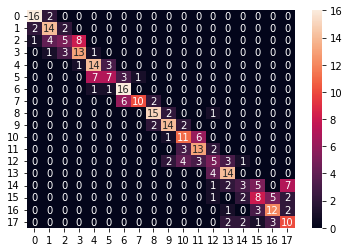

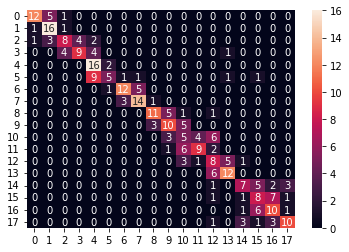

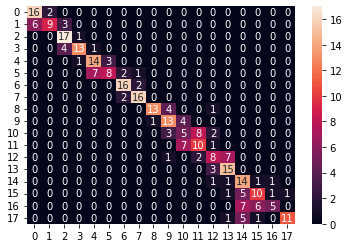

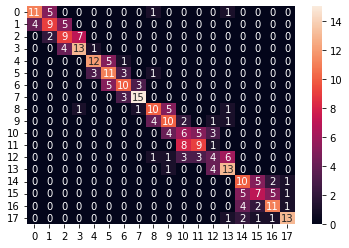

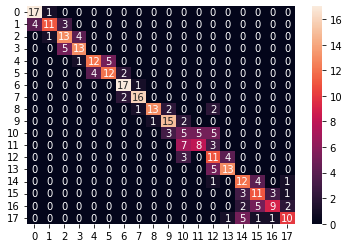

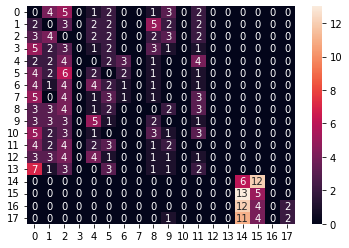

In [13]:
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
	y_pred = cross_val_predict(model, X_2d, y, cv=cv)
	conf_mat= confusion_matrix(y, y_pred)
	plt.figure()
	sns.heatmap(conf_mat, annot=True)
	plt.savefig(str(model))

    # 	y_pred[idx] = cross_val_predict(model, X_2d, y, cv=cv)
# 	conf_mat[idx] = confusion_matrix(y, y_pred)
# 	sns.heatmap(conf_mat, annot=True)


Correlation: 0.996


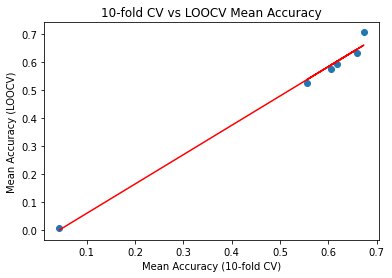

In [12]:
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')

pyplot.show()